Hey there! 

This is the code we used for exploring the categorical and textual annotations of the photovoice data to inform our findings. We were additionally using rawgraphs.io, Tableau, and QGIS for visualisation. Our final presentation containing these materials can be found [here](https://docs.google.com/presentation/d/1qKwAkY6IaktBbSohha5u3u-34N3q0VEo1n_RCSvr3Pw/edit?slide=id.g30e5a3fd898_0_449#slide=id.g30e5a3fd898_0_449).

_**Created by:** Csilla Duray_

# 1. prepare environment

## 1.1 importing libraries

In [1]:
# loading libraries for tabular data handling
import pandas as pd
import numpy as np
import re

# loading libraries for visualising data
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import time
timestr = time.strftime('%y%m%d')
print(timestr)

250509


## 1.2 defining functions

In [41]:
def countplot(data, x, order=None, hue=None, hue_order=None, ax=None, palette='Spectral', title='', show=True,):
    if hue is None:
        palette = None

    sns.countplot(data=data, x=x, order=order, hue=hue, hue_order=hue_order, palette=palette, ax=ax)
    sns.despine(offset=5, trim=True)

    if hue is not None:
        plt.legend(title=hue)

    plt.xticks(rotation=90)
    plt.title(title)

    # saving figure
    png_name = re.sub('- ', '', title.lower())
    png_name = re.sub(' ', '_', png_name)
    plt.savefig(timestr + png_name + '.png')

    # show plot
    if show == True:
      plt.show()
    else:
      plt.close()

## 1.3 loading data

### 1.3.1 in case you want to specify your path (can be skipped)

In [4]:
'''
import os
path = '/Users/an70wm/Dropbox/3. Projects/Nordhavn Living Lab (KU)/4. Data/Photovoice data/'
os.chdir(path)
'''

"\nimport os\npath = '/Users/an70wm/Dropbox/3. Projects/Nordhavn Living Lab (KU)/4. Data/Photovoice data/'\nos.chdir(path)\n"

### 1.3.2 loading cleaned data

In [19]:
# load data
df = pd.read_csv('2024.08.08 photovoice_cleaned.csv')

In [20]:
df = df.drop(['username', 'sexual_orientation', 'racial_identity', 'physical_disability', 'mental_issue'], axis=1)
df.head(2)

,photo_id,user_id,date,datetime,lat,long,url_thumb,url_original,appeal,biodiversity_perceived,...,v4_s_other_text,user_group,organization,gender,age,age_group,occupation,years_in_cph,zipcode,edu_1
0,76d4c873-3b4f-4fb9-9085-10b7104c4c1d,f48014f1-41e6-490f-9fce-b769514e2c0f,25-04-2024,2024-04-25 09:25:38,55.71664,12.609841,https://urbanbelonging.app/minio/photo-uploads...,https://urbanbelonging.app/minio/photo-uploads...,5,5,...,No_text,UCPH Student,UCPH Urban Intervention Studio,Cis female/cis woman,25.0,20-29,Student,Doesn't live in Copenhagen,Not Copenhagen,Intermediate higher education (Mellemlang Vide...
1,da370966-93f3-4bfb-9ad1-b54aace7f320,98981014-9d6c-4e37-8394-494d4f0436a6,21-05-2024,2024-05-21 12:26:18,55.72324,12.608316,https://urbanbelonging.app/minio/photo-uploads...,https://urbanbelonging.app/minio/photo-uploads...,4,4,...,No_text,Green Solutions Center,UCPH,Cis female/cis woman,56.0,50-59,Professor,Doesn't live in Copenhagen,Not Copenhagen,PhD Degree (Doktorgrad)


In [21]:
df.columns

Index(['photo_id', 'user_id', 'date', 'datetime', 'lat', 'long', 'url_thumb',
       'url_original', 'appeal', 'biodiversity_perceived', 'site', 'filename',
       'nature_elements', 'nature_quality', 'social_quality', 'sounds',
       'v1_ne_trees', 'v1_ne_grass', 'v1_ne_flowers', 'v1_ne_other_vegetation',
       'v1_ne_stones/rocks', 'v1_ne_soil', 'v1_ne_gravel', 'v1_ne_water',
       'v1_ne_birds', 'v1_ne_dogs', 'v1_ne_insects',
       'v1_ne_other_non_human_species', 'v1_ne_wind', 'v1_ne_rain',
       'v1_ne_sun', 'v1_ne_', 'v1_ne_other', 'v1_ne_other_text',
       'v2_nq_abundant', 'v2_nq_monotonous', 'v2_nq_messy', 'v2_nq_ordered',
       'v2_nq_pretty', 'v2_nq_ugly', 'v2_nq_protected',
       'v2_nq_unequally_distributed', 'v2_nq_well_cared_for',
       'v2_nq_politically_driven', 'v2_nq_wild', 'v2_nq_conventional',
       'v2_nq_', 'v2_nq_other', 'v2_nq_other_text', 'v3_sq_accessible',
       'v3_sq_not_accessible', 'v3_sq_well_protected', 'v3_sq_over_protected',
       'v3_sq_

# 2. Frequencies
- pivot tables
- countplots

In [34]:
sns.set_palette(['#335238'])

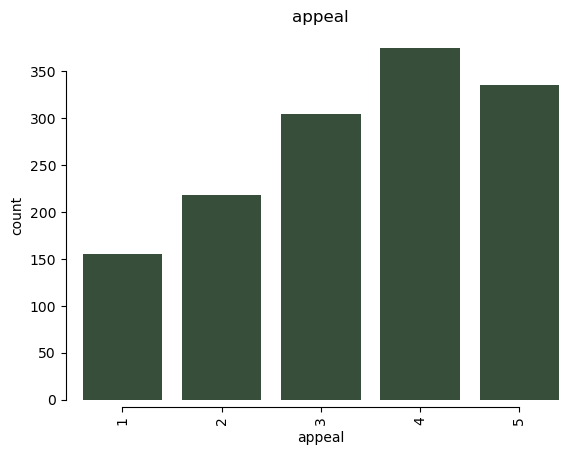

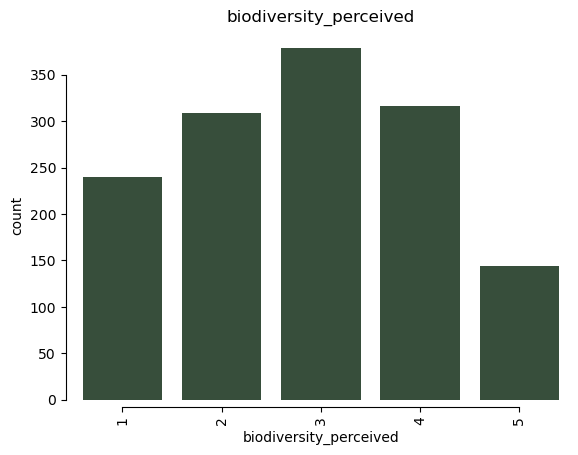

In [42]:
for col in 'appeal', 'biodiversity_perceived':
    countplot(df, col, title=col)

In [43]:
cat_dict = {'nature_elements': ['Trees', 'Grass', 'Flowers', 'Other vegetation',
                                    'Stones/rocks', 'Soil', 'Gravel', 'Water', 'Birds',
                                    'Dogs', 'Insects', 'Other non-human species',
                                    'Wind', 'Rain', 'Sun'],
            'nature_quality': ['Abundant', 'Monotonous', 'Messy', 'Ordered',
                                   'Pretty', 'Ugly', 'Protected', 'Unequally distributed',
                                   'Well cared for', 'Politically driven', 'Wild',
                                   'Conventional'],
            'social_quality': ['Accessible', 'Not accessible', 'Well-protected',
                                   'Over-protected', 'Welcoming', 'Excluding', 'Peaceful',
                                   'Stressful', 'Feels safe', 'Feels unsafe', 'Feeling of belonging',
                                   'Feeling alienated'],
            'sounds': ['Traffic', 'Construction', 'Birds', 'Human chatter',
                           'Water', 'Wind/weather', 'Insects']}

In [44]:
v1 = ['v1_ne_trees', 'v1_ne_grass', 'v1_ne_flowers', 'v1_ne_other_vegetation',
       'v1_ne_stones/rocks', 'v1_ne_soil', 'v1_ne_gravel', 'v1_ne_water',
       'v1_ne_birds', 'v1_ne_dogs', 'v1_ne_insects', 'v1_ne_other_non_human_species', 
       'v1_ne_wind', 'v1_ne_rain', 'v1_ne_sun']
v2 = ['v2_nq_abundant', 'v2_nq_monotonous', 'v2_nq_messy', 'v2_nq_ordered', 
      'v2_nq_pretty', 'v2_nq_ugly', 'v2_nq_protected', 'v2_nq_unequally_distributed',
      'v2_nq_well_cared_for', 'v2_nq_politically_driven', 'v2_nq_wild',
      'v2_nq_conventional']
v3 = ['v3_sq_accessible', 'v3_sq_not_accessible', 'v3_sq_well_protected', 
      'v3_sq_over_protected', 'v3_sq_welcoming', 'v3_sq_excluding', 'v3_sq_peaceful',
       'v3_sq_stressful', 'v3_sq_feels_safe', 'v3_sq_feels_unsafe',
       'v3_sq_feeling_of_belonging', 'v3_sq_feeling_alienated']
v4 = ['v4_s_traffic', 'v4_s_construction', 'v4_s_birds', 'v4_s_human_chatter',
      'v4_s_water', 'v4_s_wind/weather', 'v4_s_insects']

In [45]:
v1_dict = {key:value for key, value in zip(v1, cat_dict['nature_elements'])}
v2_dict = {key:value for key, value in zip(v2, cat_dict['nature_quality'])}
v3_dict = {key:value for key, value in zip(v3, cat_dict['social_quality'])}
v4_dict = {key:value for key, value in zip(v4, cat_dict['sounds'])}

other = ['v1_ne_other', 'v2_nq_other', 'v3_sq_other', 'v4_s_other']

In [46]:
v1_dict

{'v1_ne_trees': 'Trees',
 'v1_ne_grass': 'Grass',
 'v1_ne_flowers': 'Flowers',
 'v1_ne_other_vegetation': 'Other vegetation',
 'v1_ne_stones/rocks': 'Stones/rocks',
 'v1_ne_soil': 'Soil',
 'v1_ne_gravel': 'Gravel',
 'v1_ne_water': 'Water',
 'v1_ne_birds': 'Birds',
 'v1_ne_dogs': 'Dogs',
 'v1_ne_insects': 'Insects',
 'v1_ne_other_non_human_species': 'Other non-human species',
 'v1_ne_wind': 'Wind',
 'v1_ne_rain': 'Rain',
 'v1_ne_sun': 'Sun'}

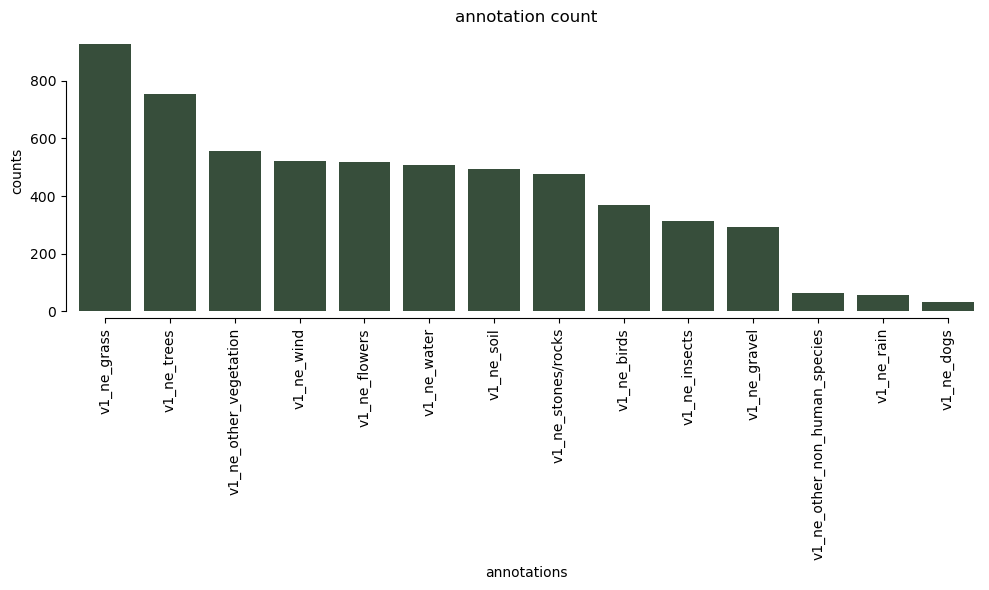

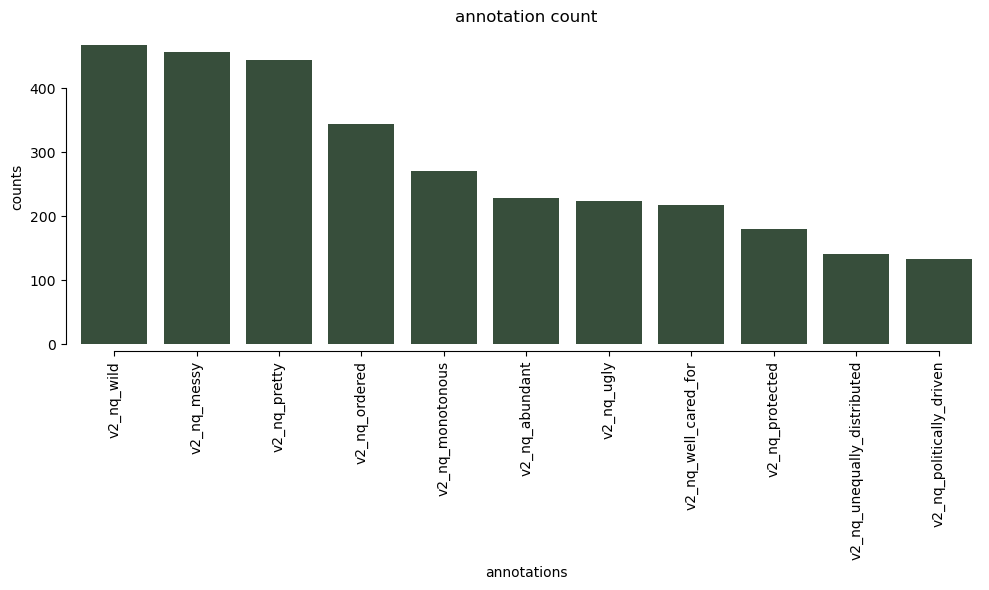

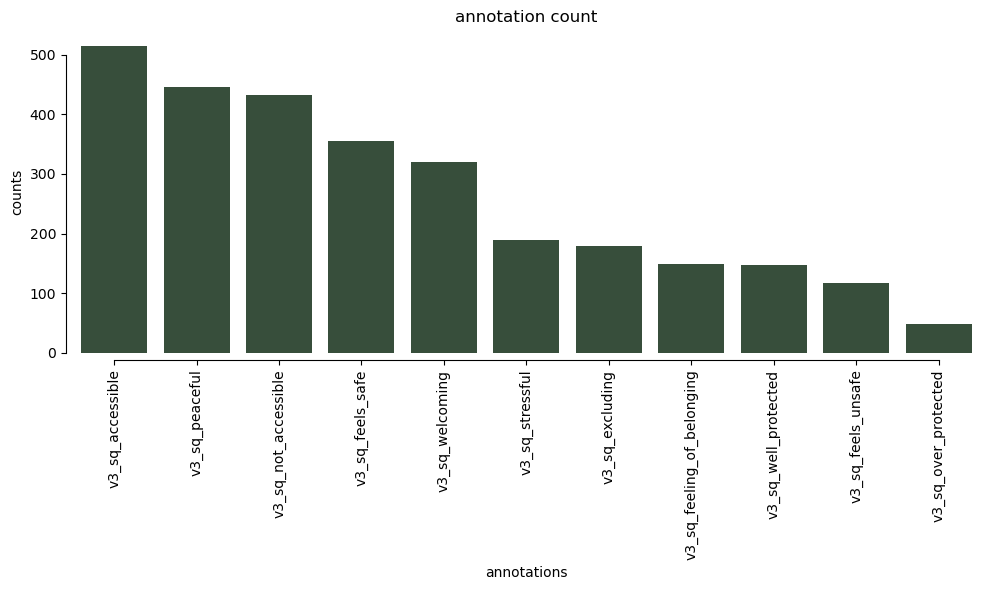

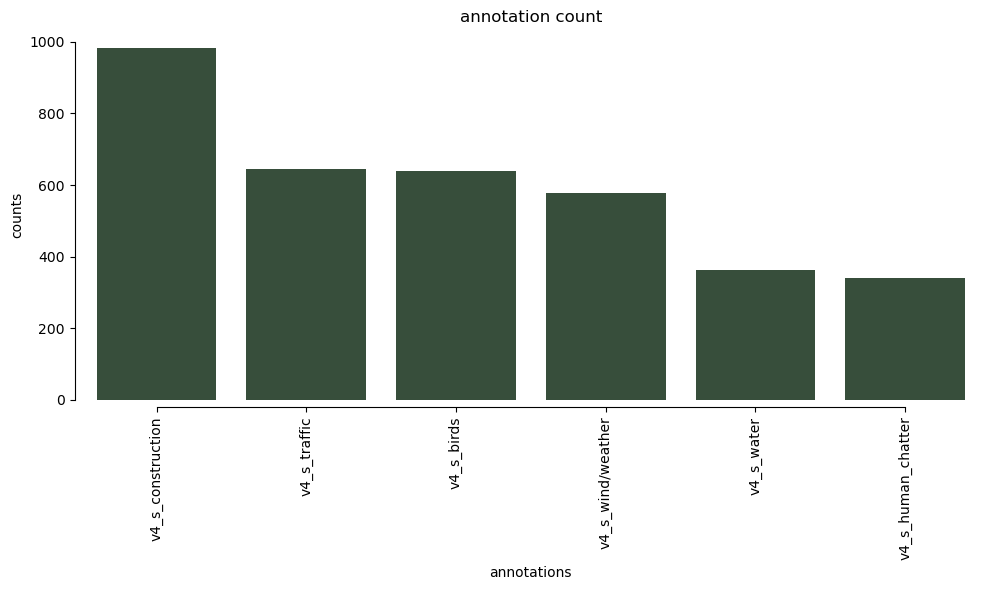

In [49]:
for variable in [v1, v2, v3, v4]:
    temp_series = df[variable].sum()[:-1]

    # Sort the Series in descending order based on values
    temp_series_sorted = temp_series.sort_values(ascending=False)

    # Plotting with seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x=temp_series_sorted.index, y=temp_series_sorted.values)
    sns.despine(offset=5, trim=True)
    plt.xticks(rotation=90)
    plt.xlabel('annotations')
    plt.ylabel('counts')
    plt.title('annotation count')
    plt.tight_layout()
    plt.show()

<Axes: xlabel='appeal', ylabel='biodiversity_perceived'>

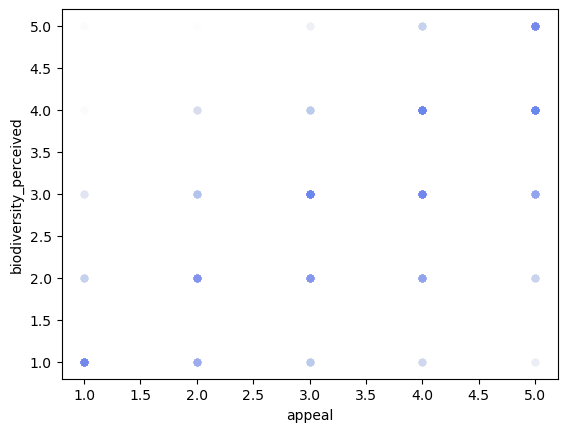

In [ ]:
# created a co-occurrence matrix using scatterplot - the co-occurrence matrix we used in Tableau was clearly more informative, but it was fun experimenting around
sns.scatterplot(data=df, x='appeal', y='biodiversity_perceived', alpha=0.01, color='#6788ee')

<Axes: xlabel='appeal', ylabel='v4_s_traffic'>

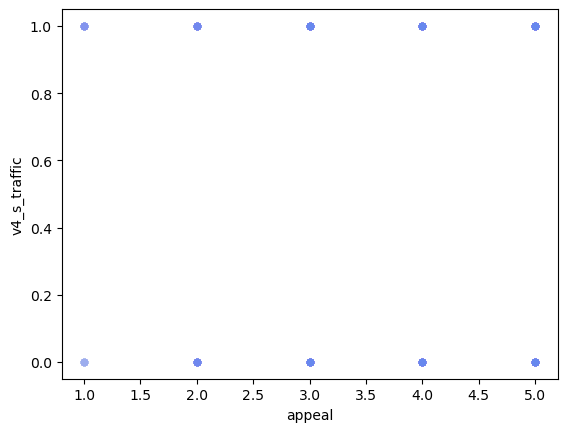

In [54]:
sns.scatterplot(data=df, x='appeal', y='v4_s_traffic', alpha=0.01, color="#6788ee")
# plt.savefig('rating_per-category_12-12.png')

# 3. Co-occurrences

I started looking into this but didn't end up using it - you might find the code useful nevertheless!

# Category matrix

In [55]:
df.columns

Index(['photo_id', 'user_id', 'date', 'datetime', 'lat', 'long', 'url_thumb',
       'url_original', 'appeal', 'biodiversity_perceived', 'site', 'filename',
       'nature_elements', 'nature_quality', 'social_quality', 'sounds',
       'v1_ne_trees', 'v1_ne_grass', 'v1_ne_flowers', 'v1_ne_other_vegetation',
       'v1_ne_stones/rocks', 'v1_ne_soil', 'v1_ne_gravel', 'v1_ne_water',
       'v1_ne_birds', 'v1_ne_dogs', 'v1_ne_insects',
       'v1_ne_other_non_human_species', 'v1_ne_wind', 'v1_ne_rain',
       'v1_ne_sun', 'v1_ne_', 'v1_ne_other', 'v1_ne_other_text',
       'v2_nq_abundant', 'v2_nq_monotonous', 'v2_nq_messy', 'v2_nq_ordered',
       'v2_nq_pretty', 'v2_nq_ugly', 'v2_nq_protected',
       'v2_nq_unequally_distributed', 'v2_nq_well_cared_for',
       'v2_nq_politically_driven', 'v2_nq_wild', 'v2_nq_conventional',
       'v2_nq_', 'v2_nq_other', 'v2_nq_other_text', 'v3_sq_accessible',
       'v3_sq_not_accessible', 'v3_sq_well_protected', 'v3_sq_over_protected',
       'v3_sq_

In [56]:
# Keep the rows where a category is added
df_cleaned = df.dropna(subset=v1)

In [57]:
# Extract unique categories
df_cleaned['nature_elements'] = df_cleaned['nature_elements'].apply(eval)
unique_categories = set(category for categories in df_cleaned['nature_elements'] for category in categories)

SyntaxError: invalid syntax (<string>, line 1)

In [ ]:
# Create a binary matrix
binary_matrix = pd.DataFrame(0, index=gdf_cleaned.index, columns=unique_categories)

for index, row in gdf_cleaned.iterrows():
    for category in row['category']:
        binary_matrix.at[index, category] = 1

# Remove columns with all zeros
binary_matrix = binary_matrix.loc[:, (binary_matrix != 0).any(axis=0)]

# Concatenate the binary matrix DataFrame with the original DataFrame
gdf_encoded = pd.concat([gdf_cleaned, binary_matrix], axis=1)

In [ ]:
# Calculate the co-occurrence matrix
co_occurrence_matrix = binary_matrix.T.dot(binary_matrix)